In [1]:
# LINK NA UCI: https://archive.ics.uci.edu/ml/datasets/MAGIC+Gamma+Telescope



%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00252/pop_failures.dat"

data = pd.read_csv("magic.csv")
data.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [6]:
data['class'] = data['class'].map({"g": 1, "h": 0})
#data['class'] = data['class'].replace(['h', 'g'], [0, 1])
data.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


In [7]:
import sklearn
from sklearn.model_selection import train_test_split

data_train_val, data_test = train_test_split(data, test_size=0.30, random_state=42)
print('Broj primjera za treniranje: ' + str(len(data_train_val)))
print('Broj primjera za testiranje: ' + str(len(data_test)))

Broj primjera za treniranje: 13314
Broj primjera za testiranje: 5706


## k-nn algoritam

In [23]:
#https://www.datacamp.com/community/tutorials/k-nearest-neighbor-classification-scikit-learn

X_train = data_train_val.drop('class',axis=1)
y_train = data_train_val['class']

X_test = data_test.drop('class',axis=1)
y_test = data_test['class']


#Import knearest neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier

#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)

#Train the model using the training sets
knn.fit(X_train, y_train)

#Predict the response for test dataset
# predict - Predict the class labels for the provided data
y_pred = knn.predict(X_test)

# predict_proba - Return probability estimates for the test data
# klase su poredane leksikografski

In [24]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8098492814581143


In [25]:
#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=7)

#Train the model using the training sets
knn.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = knn.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.810024535576586


In [26]:
#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=3)

#Train the model using the training sets
knn.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = knn.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8010865755345251


Za ROC krivulju koristimo fju `roc_curve()` za koju iz dokumentacije vidimo da imamo sljedeće:

> y_score : array, shape = [n_samples] Target scores, can either be probability estimates of the positive class, confidence values, or non-thresholded measure of decisions (as returned by “decision_function” on some classifiers).

A probability estimates dobivamo pomoću fje `predict_proba()` iz klase `KNeighborsClassifier`.

Za fju `roc_curve()` želimo procjenitelja **pozitivne klase**, znači klase 1, zato uzimamo `roc_curve(y_test, y_scores[:, 1])`

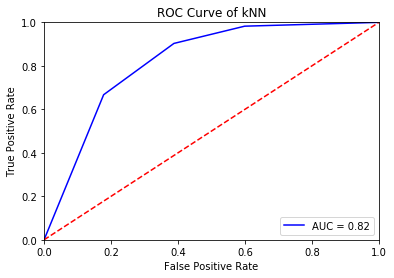

In [27]:
#https://stackoverflow.com/questions/52910061/implementing-roc-curves-for-k-nn-machine-learning-algorithm-using-python-and-sci

from sklearn.metrics import roc_curve
from sklearn.metrics import auc

y_scores = knn.predict_proba(X_test)

fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of kNN')
plt.show()

# MODEL SELECTION IDE NA CV SKUPU ! 

In [28]:
data_train, data_cv = train_test_split(data_train_val, test_size=2/7, random_state=42, train_size=5/7) #cv je 20%

X_train = data_train.drop('class',axis=1)
y_train = data_train['class']

X_cv = data_cv.drop('class', axis=1)
y_cv = data_cv['class']

X_test = data_test.drop('class',axis=1)
y_test = data_test['class']

#X_cv, X_train, X_test

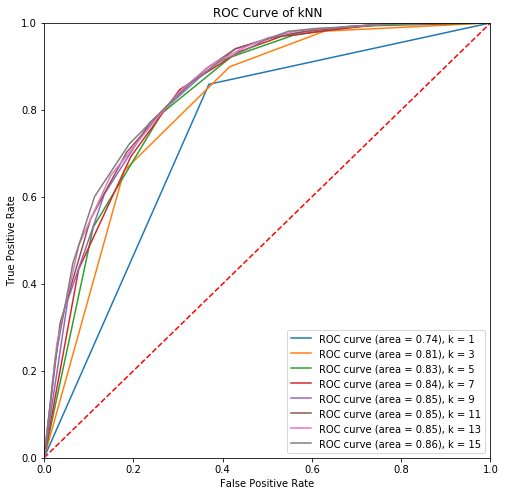

In [29]:
plt.figure(figsize=(8,8))

plt.title('Receiver Operating Characteristic')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of kNN')

n_neighbors = 1
for n_neighbors in range(1, 16, 2):
    
    #Create KNN Classifier
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)

    #Train the model using the training sets
    knn.fit(X_train, y_train)
    
    # predict with probabilities
    y_scores = knn.predict_proba(X_cv)

    fpr, tpr, threshold = roc_curve(y_cv, y_scores[:, 1])
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label = 'ROC curve (area = %0.2f), k = %0.0f' % (roc_auc, n_neighbors))

plt.legend(loc = 'lower right')
plt.show()  

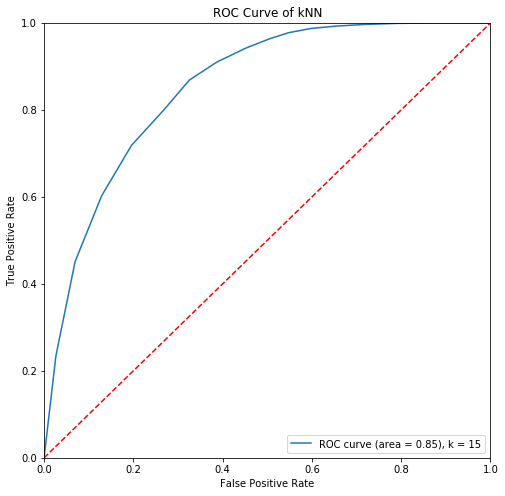

In [30]:
#odabiremo model s k=15, provjeravamo auc na testnom skupu

plt.figure(figsize=(8,8))

plt.title('Receiver Operating Characteristic')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of kNN')

n_neighbors = 15

#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=n_neighbors)

#Train the model using the training sets
knn.fit(X_train, y_train)

# predict with probabilities
y_scores = knn.predict_proba(X_test)

fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label = 'ROC curve (area = %0.2f), k = %0.0f' % (roc_auc, n_neighbors))

plt.legend(loc = 'lower right')
plt.show()  

## NORMALIZACIJA

Za korištenje k-nn algoritma savjetuje se normalizacija podataka, pa vidimo hoćemo li dobiti bolje rezultate nakon normalizacije.

In [31]:
#https://stackabuse.com/k-nearest-neighbors-algorithm-in-python-and-scikit-learn/

In [32]:
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(X_train)

X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test) 
X_cv = scaler.transform(X_cv)

(array([[-0.63892179, -0.09414902, -0.18760747, ...,  0.2230576 ,
          1.40676964, -1.52106902],
        [-0.75913704, -0.29642589, -0.56807618, ...,  0.69905319,
          0.30724607, -0.94927149],
        [ 0.75708679,  0.538271  ,  2.49046129, ..., -0.87364019,
         -1.0065107 ,  0.75132641],
        ...,
        [-0.85219961, -0.39879982, -0.71996791, ...,  0.76416974,
          0.28801663, -0.70764692],
        [-0.73148469, -0.84909406, -1.41309275, ..., -0.31848022,
          0.45632986, -1.23330843],
        [-0.53623238, -0.01661459, -0.44745007, ...,  0.95459284,
          0.36594226, -0.88425741]]),
 array([[-0.49456355, -0.08756148,  0.17405962, ...,  0.37803347,
         -0.82854826, -0.22968016],
        [-0.34379598, -0.24052621,  0.59741292, ..., -0.45451517,
         -0.50932717, -1.11031457],
        [-0.95255645, -0.58551692, -1.40675513, ..., -0.55333315,
          0.28658342, -2.11561216],
        ...,
        [-0.0344739 , -0.16125453,  0.56276724, ...,  

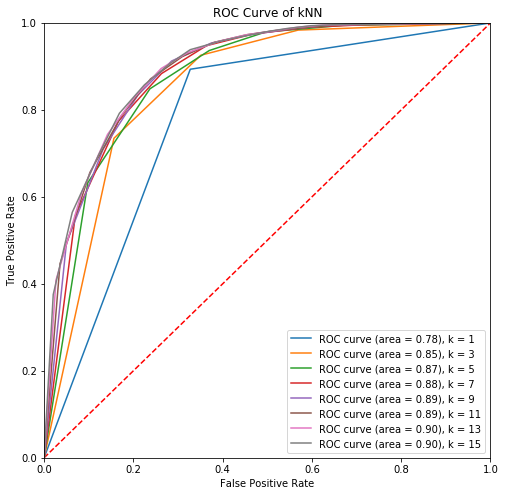

In [33]:
plt.figure(figsize=(8,8))

plt.title('Receiver Operating Characteristic')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of kNN')

n_neighbors = 1
for n_neighbors in range(1, 16, 2):
    
    #Create KNN Classifier
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)

    #Train the model using the training sets
    knn.fit(X_train, y_train)
    
    # predict with probabilities
    y_scores = knn.predict_proba(X_cv)

    fpr, tpr, threshold = roc_curve(y_cv, y_scores[:, 1])
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label = 'ROC curve (area = %0.2f), k = %0.0f' % (roc_auc, n_neighbors))

plt.legend(loc = 'lower right')
plt.show()

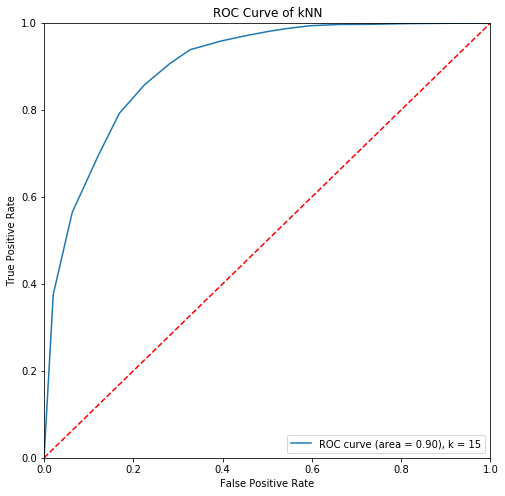

In [34]:
plt.figure(figsize=(8,8))

plt.title('Receiver Operating Characteristic')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of kNN')

n_neighbors = 15

#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=n_neighbors)

#Train the model using the training sets
knn.fit(X_train, y_train)

# predict with probabilities
y_scores = knn.predict_proba(X_cv)

fpr, tpr, threshold = roc_curve(y_cv, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label = 'ROC curve (area = %0.2f), k = %0.0f' % (roc_auc, n_neighbors))

plt.legend(loc = 'lower right')
plt.show()

## GRIDSEARCH

In [35]:
#https://www.ritchieng.com/machine-learning-efficiently-search-tuning-param/


from sklearn.model_selection import GridSearchCV

k_range = list(range(1, 40, 2))

param_grid1 = dict(n_neighbors=k_range)
print(param_grid1)

{'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39]}


In [36]:
grid1 = GridSearchCV(knn, param_grid1, cv=10, scoring='roc_auc')


y = data['class']
X = data.drop('class',axis=1)


# fit the grid with data
grid1.fit(X, y)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=15, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [37]:
# view the complete results (list of named tuples)
grid1.cv_results_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\util

{'mean_fit_time': array([0.02656159, 0.02968493, 0.02812362, 0.02812064, 0.03281019,
        0.03593493, 0.02812421, 0.03124857, 0.03280966, 0.03124857,
        0.02812192, 0.02968607, 0.03437231, 0.03749857, 0.03281054,
        0.03280985, 0.02656128, 0.03280902, 0.02656019, 0.03281105]),
 'std_fit_time': array([0.00716015, 0.00841393, 0.00937319, 0.00624794, 0.00841466,
        0.01000426, 0.00624895, 0.00698627, 0.0129787 , 0.00698665,
        0.0062493 , 0.00468671, 0.00624938, 0.0103628 , 0.00468815,
        0.00841339, 0.00715922, 0.00841377, 0.00716048, 0.008413  ]),
 'mean_score_time': array([0.06093571, 0.08906164, 0.10624585, 0.10937045, 0.13905799,
        0.1562459 , 0.14061937, 0.15155811, 0.1609323 , 0.16249526,
        0.16874545, 0.17655718, 0.18280761, 0.21405623, 0.18749473,
        0.18749502, 0.18749416, 0.19999561, 0.19999592, 0.25311854]),
 'std_score_time': array([1.29784253e-02, 7.15924462e-03, 9.37488891e-03, 6.98733973e-03,
        2.03118600e-02, 2.61463240e-

In [38]:
grid1.cv_results_['mean_test_score']

array([0.74892293, 0.82044049, 0.84134018, 0.85067415, 0.85637821,
       0.85998723, 0.86217533, 0.86430804, 0.86505156, 0.86528104,
       0.8654321 , 0.86580717, 0.86571248, 0.86637729, 0.86587866,
       0.86566296, 0.86604381, 0.86575279, 0.8658681 , 0.86579482])

Text(0, 0.5, 'Cross-Validated AUC')

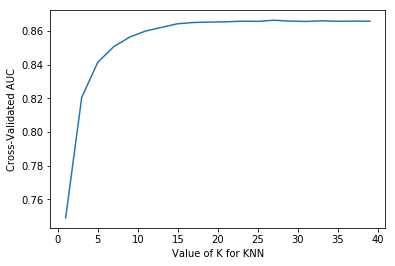

In [39]:
# plot the results
plt.plot(k_range, grid1.cv_results_['mean_test_score'])
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated AUC')

Text(0, 0.5, 'Cross-Validated AUC')

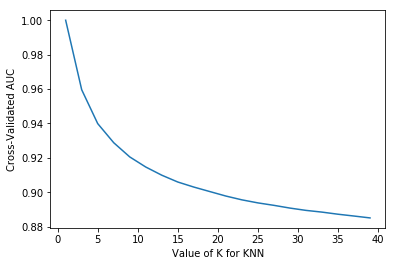

In [40]:
plt.plot(k_range, grid1.cv_results_['mean_train_score'])
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated AUC')

In [41]:
# examine the best model

# Single best score achieved across all params (k)
print(grid1.best_score_)

# Dictionary containing the parameters (k) used to generate that score
print(grid1.best_params_)

# Actual model object fit with those best parameters
# Shows default parameters that we did not specify
print(grid1.best_estimator_)

0.8663772949022607
{'n_neighbors': 27}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=27, p=2,
           weights='uniform')


### Dodatni parametri

In [45]:
k_range = list(range(21, 40, 2))
p_range = list(range(1,5)) #za metric, minkowski s tim parametrom
param_grid2 = {
    'n_neighbors' : k_range,
    'weights' : ['uniform', 'distance'],
    'p' : p_range
}

print(param_grid2)

{'n_neighbors': [21, 23, 25, 27, 29, 31, 33, 35, 37, 39], 'weights': ['uniform', 'distance'], 'p': [1, 2, 3, 4]}


In [47]:
grid2 = GridSearchCV(estimator=knn, param_grid=param_grid2, cv=10, n_jobs=-1, verbose=1, scoring='roc_auc')

y = data['class']
X = data.drop('class',axis=1)

# fit the grid with data
grid2.fit(X, y)

Fitting 10 folds for each of 80 candidates, totalling 800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  9.9min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed: 22.0min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed: 41.7min
[Parallel(n_jobs=-1)]: Done 800 out of 800 | elapsed: 42.4min finished


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=15, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_neighbors': [21, 23, 25, 27, 29, 31, 33, 35, 37, 39], 'weights': ['uniform', 'distance'], 'p': [1, 2, 3, 4]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=1)

In [48]:
# examine the best model

# Single best score achieved across all params (k)
print(grid2.best_score_)

# Dictionary containing the parameters (k) used to generate that score
print(grid2.best_params_)

# Actual model object fit with those best parameters
# Shows default parameters that we did not specify
print(grid2.best_estimator_)

0.8828438615478525
{'n_neighbors': 37, 'p': 1, 'weights': 'distance'}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=37, p=1,
           weights='distance')


## GRIDSEARCH S NORMALIZACIJOM

In [53]:
#https://stackoverflow.com/questions/51459406/apply-standardscaler-in-pipeline-in-scikit-learn-sklearn

from sklearn.pipeline import Pipeline

pipe = Pipeline([
        ('scale', StandardScaler()),
        ('clf', KNeighborsClassifier())])

k_range = list(range(1, 40, 2))

param_grid_n = dict(clf__n_neighbors=k_range)

grid_n = GridSearchCV(pipe, param_grid=param_grid_n, cv=10, n_jobs=-1, verbose=1, scoring='roc_auc')
grid_n.fit(X, y)
print(grid_n.best_score_)
print(grid_n.cv_results_)

Fitting 10 folds for each of 20 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   38.5s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  5.6min


0.9032185210485616
{'mean_fit_time': array([0.06874857, 0.06874635, 0.07187121, 0.06406028, 0.06406133,
       0.06718605, 0.06874752, 0.0890579 , 0.07655995, 0.06562362,
       0.07031038, 0.06562386, 0.0671855 , 0.07031002, 0.07812259,
       0.06406069, 0.06718528, 0.07187252, 0.08124771, 0.07622313]), 'std_fit_time': array([0.01036377, 0.00765583, 0.0103645 , 0.00468721, 0.00468702,
       0.00716029, 0.007654  , 0.02102175, 0.01474022, 0.00624944,
       0.01048173, 0.00625004, 0.00716023, 0.00781155, 0.01397473,
       0.0046881 , 0.00715991, 0.01036375, 0.01530924, 0.01907141]), 'mean_score_time': array([0.27186637, 0.42029934, 0.50467193, 0.49998448, 0.57810524,
       0.56404324, 0.59685605, 0.76091275, 0.83434732, 0.71403987,
       0.75310102, 0.72341323, 0.80309887, 0.83747315, 0.8327857 ,
       0.85309649, 0.86403348, 0.98590434, 1.11246476, 0.98277891]), 'std_score_time': array([0.01432112, 0.07141266, 0.03700633, 0.01848733, 0.07493237,
       0.02148027, 0.02296335, 0.

[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:  5.9min finished


In [54]:
# Single best score achieved across all params (k)
print(grid_n.best_score_)

# Dictionary containing the parameters (k) used to generate that score
print(grid_n.best_params_)

# Actual model object fit with those best parameters
# Shows default parameters that we did not specify
print(grid_n.best_estimator_)

0.9032185210485616
{'clf__n_neighbors': 27}
Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('clf', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=27, p=2,
           weights='uniform'))])


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


Text(0, 0.5, 'Cross-Validated AUC')

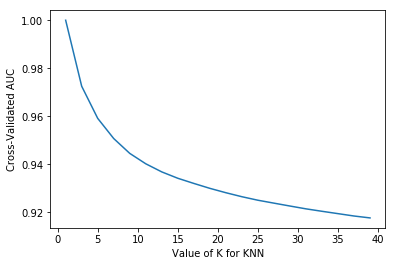

In [55]:
# plot the results
plt.plot(k_range, grid_n.cv_results_['mean_train_score'])
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated AUC')

Text(0, 0.5, 'Cross-Validated AUC')

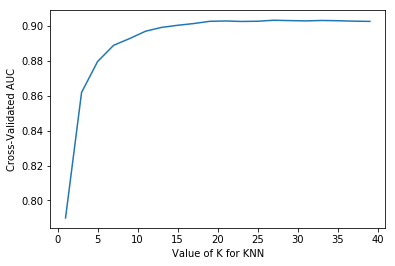

In [56]:
# plot the results
# this is identical to the one we generated above
plt.plot(k_range, grid_n.cv_results_['mean_test_score'])
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated AUC')

Vidimo da na skupu za treniranje AUC opada, dok na testnom skupu AUC u globalu raste, ali pogledajmo to malo izbliže.

Text(0, 0.5, 'Cross-Validated AUC')

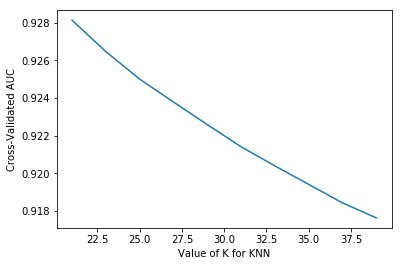

In [57]:
plt.plot(k_range[10:20], grid_n.cv_results_['mean_train_score'][10:20])
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated AUC')

Text(0, 0.5, 'Cross-Validated AUC')

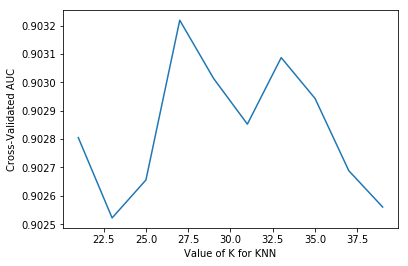

In [58]:
plt.plot(k_range[10:20], grid_n.cv_results_['mean_test_score'][10:20])
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated AUC')

Iz ovog grafa se jasnije vidi zašto je kao najbolji model onaj s 27 susjeda, ali i koliko je zapravo ta razlika mala.

### Dodatni parametri

In [59]:
k_range = list(range(21, 40, 2))
param_grid_n2 = {
    'clf__n_neighbors' : k_range,
    'clf__weights' : ['uniform', 'distance'],
    'clf__p' : p_range
}

grid_n2 = GridSearchCV(pipe, param_grid=param_grid_n2, cv=10, n_jobs=-1, verbose=1, scoring='roc_auc')
grid_n2.fit(X, y)

Fitting 10 folds for each of 80 candidates, totalling 800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed: 16.4min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed: 39.7min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed: 75.6min
[Parallel(n_jobs=-1)]: Done 800 out of 800 | elapsed: 76.8min finished


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('clf', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'))]),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'clf__n_neighbors': [21, 23, 25, 27, 29, 31, 33, 35, 37, 39], 'clf__weights': ['uniform', 'distance'], 'clf__p': [1, 2, 3, 4]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=1)

In [60]:
# Single best score achieved across all params
print(grid_n2.best_score_)

# Dictionary containing the parameters used to generate that score
print(grid_n2.best_params_)

# Actual model object fit with those best parameters
# Shows default parameters that we did not specify
print(grid_n2.best_estimator_)

0.9121644575830263
{'clf__n_neighbors': 35, 'clf__p': 1, 'clf__weights': 'distance'}
Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('clf', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=35, p=1,
           weights='distance'))])
